# data wrangling and analysis of WeRateDogs Twitter data

## data wrangling
### gathering data

In [1]:
#importing libraries
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy
import os
import json
from timeit import default_timer as timer

In [2]:
#downloading image-predictions.tsv programmatically
#if you want to redownload the data decomment the following lines of code
#response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
#with open(os.path.join('image-predictions.tsv'),mode ="wb") as file:
        #file.write(response.content)

In [3]:
#loading data
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')

In [4]:
# _if you want to redownload the data decomment the following lines of code some are originaly comment be careful
# _the original comments have '_' before them
#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer

# _Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# _These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# _NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# _df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# _change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# _NOTE TO REVIEWER: this student had mobile verification issues so the following
# _Twitter API code was sent to this student from a Udacity instructor
# _Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = twitter_archive.tweet_id.values
#len(tweet_ids)

# _Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# _Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # _This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
        #count += 1
        #print(str(count) + ": " + str(tweet_id))
        #try:
            #tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            #json.dump(tweet._json, outfile)
            #outfile.write('\n')
        #except tweepy.TweepError as e:
            #print("Fail")
            #fails_dict[tweet_id] = e
            #pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [5]:
start = timer()
tweet_likes_retw_list = []
done = 0
with open('tweet_json.txt','r') as file:
    for line in file:
        data = json.loads(line)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data ['favorite_count']
        done +=1
        tweet_likes_retw_list.append({'tweet_id': tweet_id,
                                     'retweet_count': retweet_count,
                                     'favorite_count': favorite_count})
        print(done)
end = timer()
print(end - start)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090


In [6]:
tweet_likes_retw = pd.DataFrame(tweet_likes_retw_list,columns=['tweet_id','retweet_count','favorite_count'])
tweet_likes_retw.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Assessing Data
#### `twitter_archive` Assessing

In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
twitter_archive.tweet_id.duplicated().sum()

0

In [11]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
the            8
Sadie          8
Daisy          7
an             7
Bailey         7
Toby           7
Buddy          7
Scout          6
Bella          6
Jack           6
Rusty          6
Oscar          6
Leo            6
Jax            6
Koda           6
Stanley        6
Dave           6
Milo           6
Sammy          5
            ... 
Kendall        1
Rizzo          1
Jangle         1
Joshwa         1
Ralf           1
Brownie        1
Angel          1
Clarq          1
Monty          1
Marvin         1
old            1
Jay            1
Sonny          1
Alejandro      1
Pinot          1
Jonah          1
Ralphy         1
Blakely        1
Glacier        1
Chef           1
Lacy           1
Zeek           1
Bronte         1
Barney         1
Tanner         1
Shooter        1
Ulysses        1
Terrenth      

In [14]:
twitter_archive[twitter_archive.expanded_urls.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
135,866450705531457537,NaN,NaN,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
136,866334964761202691,NaN,NaN,2017-05-21 16:48:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. At first I thought she was a clo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


- alot of `NaN` in `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `in_reply_to_status_id` and   `in_reply_to_user_id` but that ok since it could be the the original status not a retweet or a reply
- `expanded_urls` column have some `NaN`
- `doggo`, `floofer` ,`pupper`and `puppo` are nontidy *messy* and there is hidden NaN in them
- `timestamp` and `retweeted_status_timestamp` are object
- `tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id` and `retweeted_status_user_id` are numeric
- outliers in `rating_numerator` and `rating_denominator`
- there is hidden NaN in `name` column
- `expanded_urls` have duplicated urls

#### `image_predictions` Assessing

In [15]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [16]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
image_predictions[image_predictions.p1_dog == False].p1.value_counts()

seat_belt              22
web_site               19
teddy                  18
tennis_ball             9
dingo                   9
doormat                 8
swing                   7
hamster                 7
tub                     7
Siamese_cat             7
bath_towel              7
llama                   6
home_theater            6
car_mirror              6
ice_bear                6
ox                      5
hippopotamus            5
shopping_cart           5
minivan                 5
porcupine               5
bathtub                 4
patio                   4
goose                   4
jigsaw_puzzle           4
guinea_pig              4
wombat                  4
Arctic_fox              4
barrow                  4
bow_tie                 4
hog                     4
                       ..
ping-pong_ball          1
beaver                  1
rapeseed                1
wild_boar               1
robin                   1
bison                   1
sliding_door            1
military_uni

In [19]:
image_predictions[image_predictions.p1_dog == False ]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


- `tweet_id` is int
- `p1` have some predictions that are not dogs some of them are not recognized dogs and some are not dogs
- `p2_conf` and `p3_conf` are exponential which is not very clear to compare 
- some column name may not be very clear
- `p1`, `p1_conf`, `p1_dog`, `p2`, `p2_conf`, `p2_dog`, `p3`, `p3_conf`and `p3_dog` are not tidy

#### `tweet_likes_retw` Assessing

In [20]:
tweet_likes_retw.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [21]:
tweet_likes_retw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [22]:
tweet_likes_retw.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


- `tweet_id` is int 
- this dataset is separated from `twitter_archive` which make them messy

#### assessig resume
##### `twitter_archive`
###### quality issues

- alot of `NaN` in `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `in_reply_to_status_id` and   `in_reply_to_user_id` but that ok since it could be the the original status not a retweet or a reply
- `expanded_urls` column have some `NaN`
- `timestamp` and `retweeted_status_timestamp` are object
- `tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id` and `retweeted_status_user_id` are numeric
- outliers in `rating_numerator` and `rating_denominator`
- there is hidden NaN in `name` column
- `expanded_urls` have duplicated urls

###### Tidiness issues

- `doggo`, `floofer` ,`pupper`and `puppo` are nontidy *messy* and there is hidden NaN in them
--------------
##### `image_predictions`
###### quality issues

- `tweet_id` is int
- `p1` have some predictions that are not dogs some of them are not recognized dogs and some are not dogs
- `p2_conf` and `p3_conf` are exponential which is not very clear to compare 
- some column name may not be very clear

###### Tidiness issues

- `p1`, `p1_conf`, `p1_dog`, `p2`, `p2_conf`, `p2_dog`, `p3`, `p3_conf`and `p3_dog` are not tidy
- `image_predictions` could be merged with `twitter_archive`
-------------------
##### `tweet_likes_retw`
###### quality issues

- `tweet_id` is int

###### Tidiness issues

- this dataset is separated from `twitter_archive` which make them messy

### data cleaning

In [23]:
# making a copy for each data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_likes_retw_clean = tweet_likes_retw.copy()

#### `twitter_archive_clean` cleaning

----------------------------
##### define
- making `doggo`, `floofer` ,`pupper`and `puppo` tidy

##### code

In [24]:
# i think melt would take more code
#replace None with ''
twitter_archive_clean.doggo.replace('None','',inplace= True)
twitter_archive_clean.pupper.replace('None','',inplace= True)
twitter_archive_clean.puppo.replace('None','',inplace= True)
twitter_archive_clean.floofer.replace('None','',inplace= True)
# summing all of them to one column
twitter_archive_clean['stage'] = twitter_archive_clean.doggo+twitter_archive_clean.floofer+twitter_archive_clean.pupper+twitter_archive_clean.puppo
#replac empty with NaN
twitter_archive_clean.stage.replace('',np.nan,inplace= True)
# droping 'doggo', 'floofer' ,'pupper'and 'puppo'
twitter_archive_clean.drop(['doggo', 'floofer' ,'pupper', 'puppo'],
                    axis = 1,inplace = True)

##### test

In [25]:
twitter_archive_clean.stage.value_counts()

pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggofloofer      1
doggopuppo        1
Name: stage, dtype: int64

In [26]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stage                         380 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 193.3+ KB


some dogs have more than category may be it is a mistake but i will keep it for now

----------------------
##### define
- making stages with multiple category more clear

##### code

In [27]:
twitter_archive_clean.stage.replace('doggopupper','doggo, pupper',inplace= True)
twitter_archive_clean.stage.replace('doggofloofer','doggo, floofer',inplace= True)
twitter_archive_clean.stage.replace('doggopuppo','doggo, puppo',inplace= True)

##### test

In [28]:
twitter_archive_clean.stage.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: stage, dtype: int64

----------------------------
##### define
- setting stage as `category` instead of `object`

##### code

In [29]:
twitter_archive_clean.stage=twitter_archive_clean.stage.astype('category')

##### test

In [30]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stage                         380 non-null category
dtypes: category(1), float64(4), int64(3), object(6)
memory usage: 186.6+ KB


---------------------
##### define
- replace _None_ names by `NaN`

##### code

In [31]:
twitter_archive_clean.name.replace('None',np.nan,inplace= True)

##### test

In [32]:
twitter_archive_clean.name.value_counts()

a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Tucker       10
Lola         10
Penny        10
Bo            9
Winston       9
the           8
Sadie         8
Buddy         7
Bailey        7
an            7
Toby          7
Daisy         7
Koda          6
Dave          6
Jack          6
Bella         6
Rusty         6
Jax           6
Stanley       6
Milo          6
Leo           6
Oscar         6
Scout         6
Bentley       5
Louis         5
             ..
Chesney       1
Kendall       1
Rizzo         1
Jangle        1
Joshwa        1
Angel         1
Clarq         1
Chef          1
Blakely       1
Fabio         1
Marvin        1
old           1
Jay           1
Sonny         1
Alejandro     1
Pinot         1
Jonah         1
Ralphy        1
Monty         1
Keet          1
Glacier       1
Lacy          1
Zeek          1
Bronte        1
Barney        1
Tanner        1
Shooter       1
Ulysses       1
Terrenth      1
Einstein      1
Name: name, Length: 956,

--------------------------
##### define
- making `timestamp` a datetime instead of object

##### code

In [33]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

##### test

In [34]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
stage                         380 non-null category
dtypes: category(1), datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 195.8+ KB


------------------------
##### define
- merging `twitter_archive_clean` and `tweet_likes_retw`

##### code

In [35]:
twitter_archive_clean= pd.merge(twitter_archive_clean,tweet_likes_retw,on = 'tweet_id',how='outer')

##### test

In [36]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
stage                         380 non-null category
retweet_count                 2354 non-null float64
favorite_count                2354 non-null float64
dtypes: category(1), datetime64[ns](1), float64(6), int64(3), object(5)


In [37]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774.0,41048.0


-------------------------------
##### define
- renaming `image_predictions_clean` columns 

##### code

In [38]:
#i changed the names to be easy to use with pd.wide_to_long
image_predictions_clean.rename(columns={'p1':'prediction1',
                                       'p2':'prediction2',
                                       'p3':'prediction3',
                                       'p1_conf':'confidence1',
                                       'p2_conf':'confidence2',
                                       'p3_conf':'confidence3',
                                       'p1_dog':'dog1',
                                       'p2_dog':'dog2',
                                       'p3_dog':'dog3'},inplace = True)

##### test

In [39]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id       2075 non-null int64
jpg_url        2075 non-null object
img_num        2075 non-null int64
prediction1    2075 non-null object
confidence1    2075 non-null float64
dog1           2075 non-null bool
prediction2    2075 non-null object
confidence2    2075 non-null float64
dog2           2075 non-null bool
prediction3    2075 non-null object
confidence3    2075 non-null float64
dog3           2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


---------------------
#####  define
- merging `twitter_archive_clean` and `image_predictions_clean`

##### code

In [40]:
twitter_archive_clean= pd.merge(twitter_archive_clean,image_predictions_clean,on = 'tweet_id',how='outer')

##### test

In [41]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,prediction1,confidence1,dog1,prediction2,confidence2,dog2,prediction3,confidence3,dog3
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [42]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
stage                         380 non-null category
retweet_count                 2354 non-null float64
favorite_count                2354 non-null float64
jpg_url                       2075 non-null object
img_num              

------------------------------------
##### define
- removing tweets that are retweets or replies from `twitter_archive_clean`

##### code

In [43]:
twitter_archive_clean = twitter_archive_clean[(( twitter_archive_clean.retweeted_status_id.isnull()) &\
                                               ( twitter_archive_clean.in_reply_to_status_id.isnull()))]

##### test

In [44]:
twitter_archive_clean.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

In [45]:
twitter_archive_clean.in_reply_to_status_id.value_counts()

Series([], Name: in_reply_to_status_id, dtype: int64)

---------------------------
##### define
- remove `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `in_reply_to_status_id` and   `in_reply_to_user_id` columns as they are all nulls

##### code

In [46]:
twitter_archive_clean.drop(['retweeted_status_id',
                      'retweeted_status_user_id',
                      'retweeted_status_timestamp',
                      'in_reply_to_status_id',
                      'in_reply_to_user_id'],
                    axis = 1,inplace = True)

##### test

In [47]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1494 non-null object
stage                 336 non-null category
retweet_count         2097 non-null float64
favorite_count        2097 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
prediction1           1971 non-null object
confidence1           1971 non-null float64
dog1                  1971 non-null object
prediction2           1971 non-null object
confidence2           1971 non-null float64
dog2                  1971 non-null object
prediction3           1971 non-null object
confidence3           

----------------------
##### define
- completing messing values of `twitter_archive.expanded_urls` and solve duplicated

##### code

In [48]:
ids_without_url=twitter_archive_clean[twitter_archive_clean.expanded_urls.isnull()].tweet_id.values

In [49]:
ids_without_url

array([828361771580813312, 785515384317313025, 696518437233913856],
      dtype=int64)

In [50]:
twitter_archive_clean[twitter_archive_clean.expanded_urls.duplicated()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,prediction1,confidence1,dog1,prediction2,confidence2,dog2,prediction3,confidence3,dog3
707,785515384317313025,2016-10-10 16:20:36,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,10,10,NaN,NaN,1477.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1445,696518437233913856,2016-02-08 02:18:30,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,10,10,NaN,pupper,1887.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2212,668587383441514497,2015-11-23 00:30:28,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,https://vine.co/v/ea0OwvPTx9l,13,10,the,NaN,1174.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
twitter_archive_clean[twitter_archive_clean.expanded_urls.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,prediction1,confidence1,dog1,prediction2,confidence2,dog2,prediction3,confidence3,dog3
375,828361771580813312,2017-02-05 21:56:51,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,12,10,NaN,NaN,195.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
707,785515384317313025,2016-10-10 16:20:36,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,10,10,NaN,NaN,1477.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1445,696518437233913856,2016-02-08 02:18:30,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,10,10,NaN,pupper,1887.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


sound that it not worth it and alot of the lost urls were for retweets or replies and most duplicated are nulls

---------------------
##### define
- correcting some values in `rating_numerator`

##### code

In [52]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator','rating_denominator']]

C:\Users\MasterO\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


,text,rating_numerator,rating_denominator
45,This is Bella. She hopes her smile made you sm...,5,10
695,"This is Logan, the Chow who lived. He solemnly...",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
1712,Here we have uncovered an entire battalion of ...,26,10


In [53]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]['text']

C:\Users\MasterO\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


45      This is Bella. She hopes her smile made you sm...
695     This is Logan, the Chow who lived. He solemnly...
763     This is Sophie. She's a Jubilant Bush Pupper. ...
1712    Here we have uncovered an entire battalion of ...
Name: text, dtype: object

In [54]:
twitter_archive_clean.loc[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)"),'rating_numerator'] = twitter_archive_clean.text.str.extract(r"(\d+\.\d*)",expand= False)

C:\Users\MasterO\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


##### test

In [55]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator','rating_denominator']]

C:\Users\MasterO\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


,text,rating_numerator,rating_denominator
45,This is Bella. She hopes her smile made you sm...,13.5,10
695,"This is Logan, the Chow who lived. He solemnly...",9.75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10
1712,Here we have uncovered an entire battalion of ...,11.26,10


In [56]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null object
rating_denominator    2097 non-null int64
name                  1494 non-null object
stage                 336 non-null category
retweet_count         2097 non-null float64
favorite_count        2097 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
prediction1           1971 non-null object
confidence1           1971 non-null float64
dog1                  1971 non-null object
prediction2           1971 non-null object
confidence2           1971 non-null float64
dog2                  1971 non-null object
prediction3           1971 non-null object
confidence3          

---------------------
##### define
- setting `rating_numerator` as float

##### code

In [57]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype('float')

##### test

In [58]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  1494 non-null object
stage                 336 non-null category
retweet_count         2097 non-null float64
favorite_count        2097 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
prediction1           1971 non-null object
confidence1           1971 non-null float64
dog1                  1971 non-null object
prediction2           1971 non-null object
confidence2           1971 non-null float64
dog2                  1971 non-null object
prediction3           1971 non-null object
confidence3         

----------------------------
##### define 
-  `rating_numerator` / `rating_denominator` * 10 to get one column to compare and get rid of some outliers

##### code

In [59]:
twitter_archive_clean['rating_out_of_10']=twitter_archive_clean.rating_numerator/twitter_archive_clean.rating_denominator*10

##### test

In [60]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,prediction1,confidence1,dog1,prediction2,confidence2,dog2,prediction3,confidence3,dog3,rating_out_of_10
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,8853.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,13.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,6514.0,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,13.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,4328.0,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,12.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,8964.0,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,13.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,9774.0,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,12.0


In [61]:
twitter_archive_clean.rating_out_of_10.value_counts()

12.000000      490
10.000000      438
11.000000      418
13.000000      287
9.000000       153
8.000000        98
7.000000        51
14.000000       38
5.000000        34
6.000000        32
3.000000        19
4.000000        15
2.000000        10
1.000000         4
11.260000        1
13.500000        1
9.750000         1
8.181818         1
34.285714        1
0.000000         1
11.270000        1
6.363636         1
420.000000       1
1776.000000      1
Name: rating_out_of_10, dtype: int64

outliers are less now and rating is more uniform but there is still some outliers i would like to keep but omit from analysis

In [62]:
extreme_rat_id=twitter_archive_clean[twitter_archive_clean.rating_out_of_10 > 15].tweet_id.values

In [63]:
#trying to see those with outliers
for id in extreme_rat_id :
    print(twitter_archive_clean[twitter_archive_clean.tweet_id == id].expanded_urls)

516    https://www.gofundme.com/sams-smile,https://tw...
Name: expanded_urls, dtype: object
979    https://twitter.com/dog_rates/status/749981277...
Name: expanded_urls, dtype: object
2074    https://twitter.com/dog_rates/status/670842764...
Name: expanded_urls, dtype: object


-------------------
##### define
- setting `tweet_id` to be object

##### code

In [64]:
twitter_archive_clean.tweet_id =twitter_archive_clean.tweet_id.astype('object')

##### test

In [65]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  1494 non-null object
stage                 336 non-null category
retweet_count         2097 non-null float64
favorite_count        2097 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
prediction1           1971 non-null object
confidence1           1971 non-null float64
dog1                  1971 non-null object
prediction2           1971 non-null object
confidence2           1971 non-null float64
dog2                  1971 non-null object
prediction3           1971 non-null object
confidence3        

#### cleaning `image_predictions_clean`

-------------------
##### define 
- making `prediction1` , `confidence1`, `dog1` , `prediction2` , `confidence2`, `dog2` , `prediction3` , `confidence3`and `dog3` tidy

##### code

In [66]:
#https://stackoverflow.com/questions/45662403/melting-pandas-data-frame-with-multiple-variable-names-and-multiple-value-names
#making `prediction1` , `confidence1`, `dog1` ,`prediction2` , `confidence2`, `dog2` ,
#`prediction3` , `confidence3`and `dog3` tidy
# if you want to set image_prediction_clean as long instead of wide decomment the next lines
#i = ['tweet_id','jpg_url','img_num']
#stubnames=['prediction','confidence','dog']
#image_predictions_clean = pd.wide_to_long(image_predictions_clean, i = i ,stubnames= stubnames ,j = 'model_code').reset_index()

### data saving

In [67]:
twitter_archive_clean.to_csv('twitter_archive_master.csv',index= False)

### data analysis

Text(0.5,0,'retweet_count')

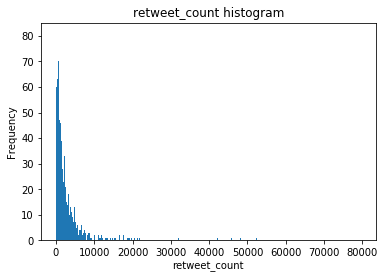

In [68]:
twitter_archive_clean.retweet_count.plot.hist(bins=1000)
plt.title('retweet_count histogram')
plt.xlabel('retweet_count')

Text(0.5,0,'retweet_count')

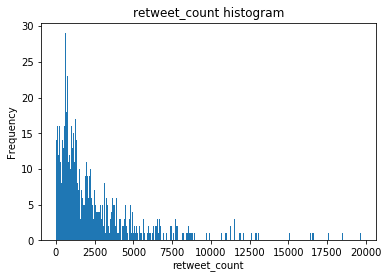

In [69]:
# zoomig in for more details 
twitter_archive_clean[twitter_archive_clean.retweet_count < 20000].retweet_count.plot.hist(bins=1000)
plt.title('retweet_count histogram')
plt.xlabel('retweet_count')

- most `retweet_count` are below 5000

Text(0.5,0,'favorite_count')

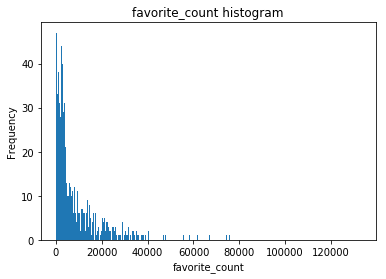

In [70]:
twitter_archive_clean.favorite_count.plot.hist(bins=1000)
plt.title('favorite_count histogram')
plt.xlabel('favorite_count')

- most `favorite_count` are below 10000

Text(0.5,0,'favorite_count')

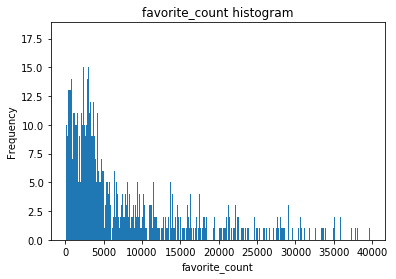

In [71]:
# zoomig in for more details 
twitter_archive_clean[twitter_archive_clean.favorite_count < 40000].favorite_count.plot.hist(bins=1000)
plt.title('favorite_count histogram')
plt.xlabel('favorite_count')

Text(0.5,0,'rating_out_of_10')

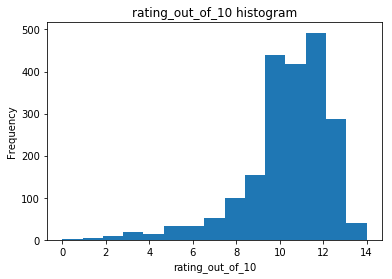

In [84]:
twitter_archive_clean[twitter_archive_clean.rating_out_of_10 <= 20].rating_out_of_10.plot.hist(15)
plt.title('rating_out_of_10 histogram')
plt.xlabel('rating_out_of_10')

- the bulk of rating is 10 and above

In [73]:
twitter_archive_clean[['confidence1' ,'confidence2' ,'confidence3']].mean()

confidence1    0.594558
confidence2    0.134585
confidence3    0.060166
dtype: float64

- confidence interval for model 1 is the highest then 2 and lastly 3

In [74]:
twitter_archive_clean.groupby('stage').mean()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,confidence1,confidence2,confidence3,rating_out_of_10
stage,,,,,,,,,
doggo,11.847222,10,6610.361111,18060.194444,1.285714,0.577058,0.157341,0.062083,11.847222
"doggo, floofer",11.000000,10,3433.000000,17169.000000,1.000000,0.354733,0.177538,0.131706,11.000000
"doggo, pupper",11.111111,10,4237.666667,12636.888889,1.125000,0.825542,0.091143,0.029868,11.111111
"doggo, puppo",13.000000,10,19196.000000,47844.000000,1.000000,0.321676,0.115138,0.096100,13.000000
floofer,11.888889,10,4155.888889,11064.444444,1.142857,0.609204,0.155319,0.047997,11.888889
pupper,10.734253,10,2486.095023,7249.678733,1.253731,0.605832,0.130416,0.055902,10.734253
puppo,12.000000,10,6600.043478,21622.565217,1.454545,0.722293,0.135468,0.043701,12.000000


- the highest of all is doggopuppo but why

In [75]:
twitter_archive_clean[twitter_archive_clean.stage == 'doggopuppo'].tweet_id

Series([], Name: tweet_id, dtype: object)

In [76]:
image_predictions_clean[image_predictions_clean.tweet_id == 855851453814013952]

,tweet_id,jpg_url,img_num,prediction1,confidence1,dog1,prediction2,confidence2,dog2,prediction3,confidence3,dog3
1919,855851453814013952,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.0961,True


In [77]:
twitter_archive_clean['prediction1' ].value_counts()

golden_retriever             137
Labrador_retriever            94
Pembroke                      88
Chihuahua                     78
pug                           54
chow                          41
Samoyed                       40
Pomeranian                    38
toy_poodle                    37
malamute                      29
cocker_spaniel                27
French_bulldog                26
Chesapeake_Bay_retriever      23
seat_belt                     21
miniature_pinscher            21
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     19
Eskimo_dog                    18
Shetland_sheepdog             18
Maltese_dog                   18
teddy                         17
beagle                        17
Cardigan                      17
Shih-Tzu                      17
Italian_greyhound             16
Rottweiler                    16
kuvasz                        15
Lakeland_terrier              15
Great_Pyrenees                14
          

In [78]:
twitter_archive_clean.retweet_count.max()

79515.0

In [79]:
twitter_archive_clean.favorite_count.max()

132810.0

In [82]:
twitter_archive_clean[ twitter_archive_clean.retweet_count == twitter_archive_clean.retweet_count.max()].jpg_url

1039    https://pbs.twimg.com/ext_tw_video_thumb/74423...
Name: jpg_url, dtype: object

In [83]:
twitter_archive_clean[ twitter_archive_clean.favorite_count == twitter_archive_clean.favorite_count.max()].jpg_url

413    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
Name: jpg_url, dtype: object